In [87]:
'''
MacOS专用字体设置
MacOS 系统中使用的中文字体路径
适用于MacOS15版本
可直接复制到代码中使用
'''
import matplotlib.pyplot as plt
from matplotlib import font_manager
# 设置字体路径
font_path = '/System/Library/Fonts/STHeiti Medium.ttc'

# 加载字体
my_font = font_manager.FontProperties(fname=font_path)

# 设置为默认字体
plt.rcParams['font.family'] = my_font.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

In [88]:
import pandas as pd

In [89]:
df = pd.read_excel('客户信息及违约表现.xlsx')
df.head()

,收入,年龄,性别,历史授信额度,历史违约次数,是否违约
0,462087,26,1,0,1,1
1,362324,32,0,13583,0,1
2,332011,52,1,0,1,1
3,252895,39,0,0,1,1
4,352355,50,1,0,0,1


In [90]:
df.isnull().sum()

收入        0
年龄        0
性别        0
历史授信额度    0
历史违约次数    0
是否违约      0
dtype: int64

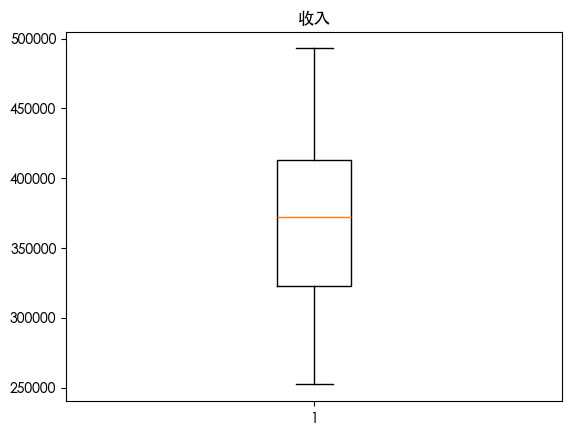

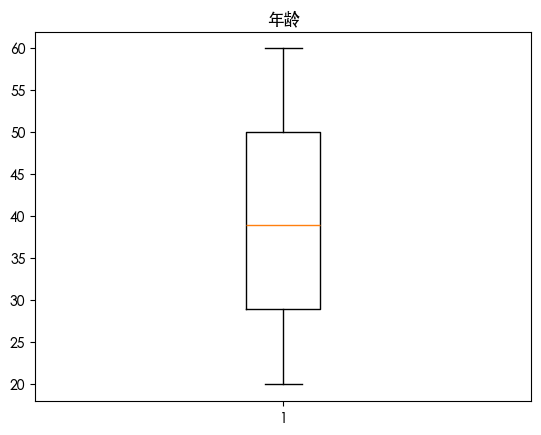

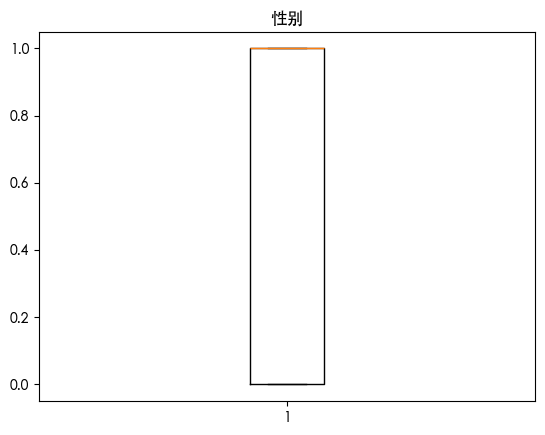

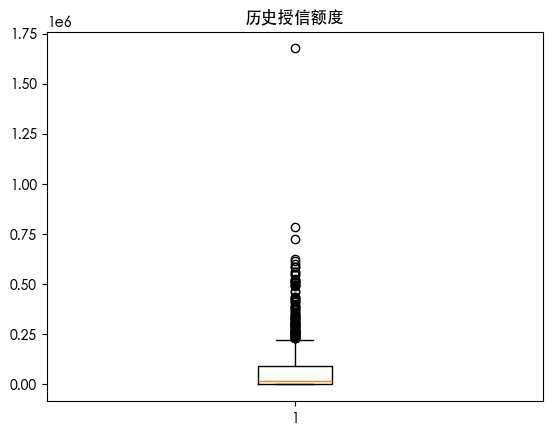

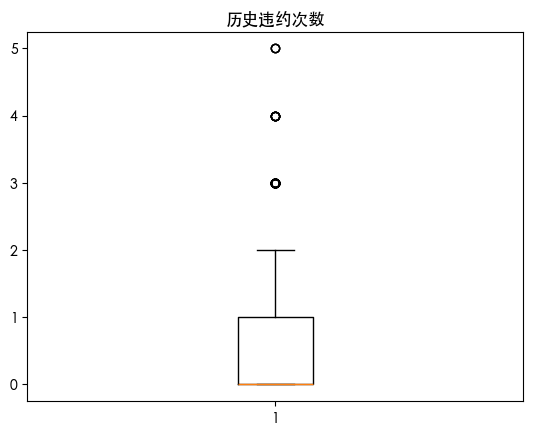

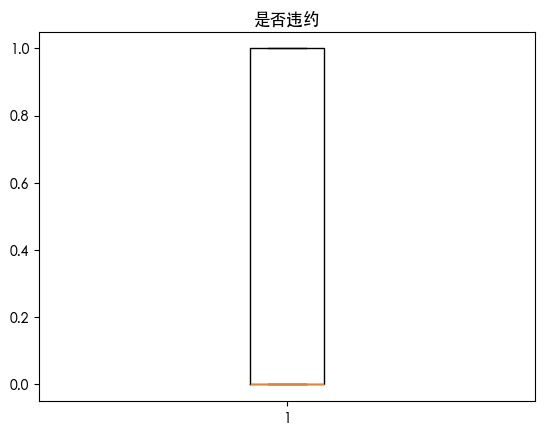

In [91]:
for col in df.columns:
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

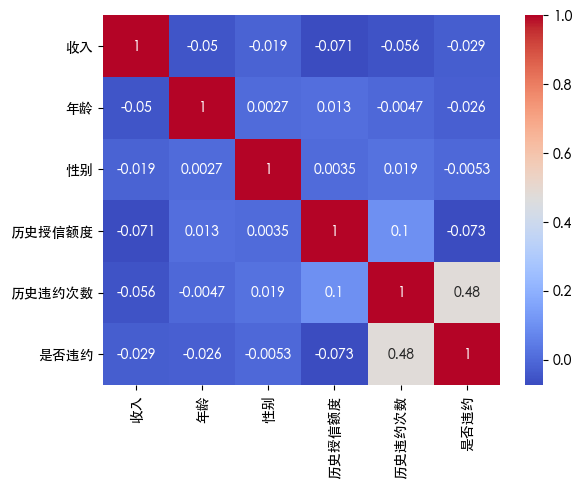

In [92]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

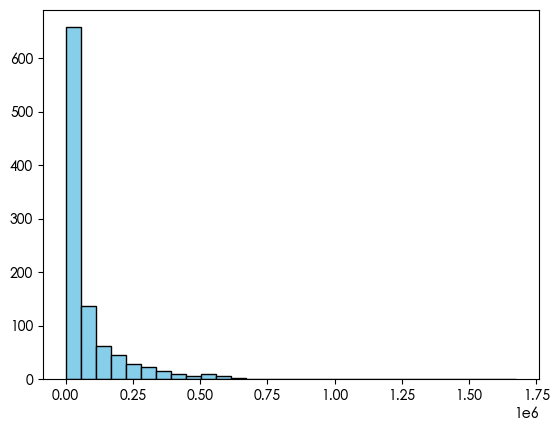

In [93]:
plt.hist(df['历史授信额度'], bins=30, color='skyblue', edgecolor='black')
plt.show()

数据是右偏的 并且是长尾份分布

In [94]:
import numpy as np
col = '历史授信额度'
df[f'{col}_log'] = np.log1p(df[col])

In [95]:
col = '历史违约次数'

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[f'{col}_is_outlier'] = ((df[col] < lower_bound) | (df[col] > upper_bound)).astype(int)

In [96]:
df = df.drop(columns=['历史授信额度'])

In [98]:
X = df.drop(columns=['是否违约'])
y = df['是否违约']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[110   9]
 [ 29  52]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       119
           1       0.85      0.64      0.73        81

    accuracy                           0.81       200
   macro avg       0.82      0.78      0.79       200
weighted avg       0.82      0.81      0.80       200



# LGBM

In [103]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 318, number of negative: 482
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 500
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.397500 -> initscore=-0.415893
[LightGBM] [Info] Start training from score -0.415893
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


# 随机森林

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rm = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)
rm.fit(X_train, y_train)
y_pred = rm.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[117   2]
 [ 29  52]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       119
           1       0.96      0.64      0.77        81

    accuracy                           0.84       200
   macro avg       0.88      0.81      0.83       200
weighted avg       0.87      0.84      0.84       200



# 贝叶斯

In [105]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[111   8]
 [ 43  38]]
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       119
           1       0.83      0.47      0.60        81

    accuracy                           0.74       200
   macro avg       0.77      0.70      0.71       200
weighted avg       0.76      0.74      0.73       200



# 逻辑回归

In [106]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[88 31]
 [60 21]]
              precision    recall  f1-score   support

           0       0.59      0.74      0.66       119
           1       0.40      0.26      0.32        81

    accuracy                           0.55       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.52      0.55      0.52       200

